In [0]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
mnist = keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [103]:
print("x_train:", x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
x_train1=x_train.reshape(60000,784)
x_test1=x_test.reshape(10000,784)

y_train1=keras.utils.to_categorical(y_train,10)
y_test1=keras.utils.to_categorical(y_test,10)
print("y_train_categorical:",y_train1.shape)
print("y_test_categorical:",y_test1.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
y_train_categorical: (60000, 10)
y_test_categorical: (10000, 10)


In [104]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(200, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.98),
#   tf.keras.layers.Dense(200, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.98),                                    
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

Dropout_en=1

model = tf.keras.models.Sequential()  
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation='relu',input_dim=784))
if(Dropout_en==1):
  model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(200, activation='relu',input_dim=200))
if(Dropout_en==1):
  model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax',input_dim=200))  

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#history=model.fit(x_train, y_train1, epochs=5)
history=model.fit(x_train1, y_train1, batch_size=500, epochs=20, validation_data=(x_test1,y_test1))

test_result=model.evaluate(x_test1, y_test1)
print("Test Accuracy::",test_result[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.4982 - acc: 0.8509 - val_loss: 0.2013 - val_acc: 0.9393
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2125 - acc: 0.9363 - val_loss: 0.1334 - val_acc: 0.9595
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1527 - acc: 0.9535 - val_loss: 0.1212 - val_acc: 0.9638
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1201 - acc: 0.9636 - val_loss: 0.0892 - val_acc: 0.9720
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1002 - acc: 0.9694 - val_loss: 0.0805 - val_acc: 0.9746
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0876 - acc: 0.9731 - val_loss: 0.0792 - val_acc: 0.9757
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0778 - acc: 0.9759 - val_loss: 0.0707 - val_acc

array([[7, 2, 1, 0, 4],
       [1, 4, 9, 5, 9],
       [0, 6, 9, 0, 1],
       [5, 9, 7, 3, 4],
       [9, 6, 6, 5, 4]])

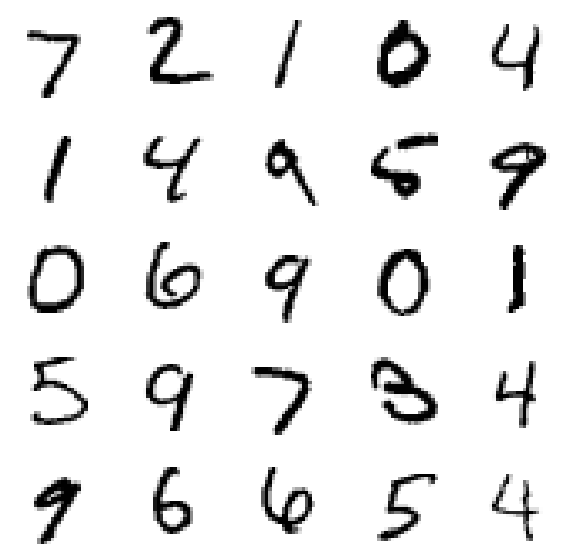

In [105]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)

predict_val=model.predict(x_test1)
predict_label=predict_val.argmax(axis=1)
predict_label[:25].reshape(5,5)


Text(0.5,1,'Accuracy Curves')

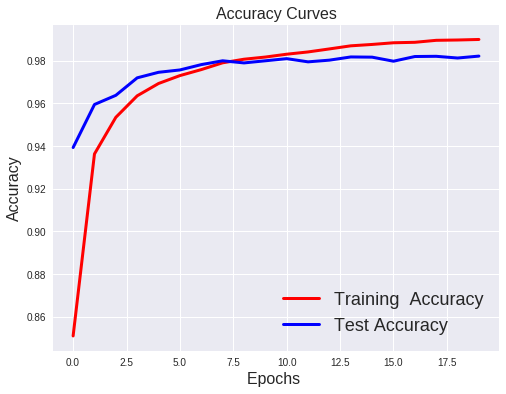

In [106]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training  Accuracy', 'Test Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)